In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from importlib import reload
import pandas as pd
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import matplotlib.pyplot as plt
from src.constants import PROCESSED_POLCOM_DATA_2022_M_PATH, PROCESSED_POLCOM_DATA_2022_Y_PATH
from src.utils import concat_dataframes_horizontally

In [3]:
dfs_M = [pd.read_parquet(file) for file in Path(PROCESSED_POLCOM_DATA_2022_M_PATH).glob("*.parquet")]
dfs_Y = [pd.read_parquet(file) for file in Path(PROCESSED_POLCOM_DATA_2022_Y_PATH).glob("*.parquet")]

In [4]:
# Extract column names for each dataset
columns_M = {file.name: df.columns.tolist() for file, df in zip(Path(PROCESSED_POLCOM_DATA_2022_M_PATH).glob("*.parquet"), dfs_M)}
columns_Y = {file.name: df.columns.tolist() for file, df in zip(Path(PROCESSED_POLCOM_DATA_2022_Y_PATH).glob("*.parquet"), dfs_Y)}

# Display the columns for each dataset
columns_M

{'VM06.parquet': ['CPU_USAGE_MHZ',
  'CPU_USAGE_PERCENT',
  'MEMORY_USAGE_KB',
  'MEMORY_USAGE_PERCENT',
  'NODE_1_DISK_IO_RATE_KBPS',
  'NODE_1_DISK_I_RATE_KBPS',
  'NODE_1_DISK_O_RATE_KBPS',
  'df3_NODE_1_DISK_IO_RATE_KBPS',
  'df3_NODE_1_DISK_I_RATE_KBPS',
  'df3_NODE_1_DISK_O_RATE_KBPS',
  'NODE_2_DISK_IO_RATE_KBPS',
  'NODE_2_DISK_I_RATE_KBPS',
  'NODE_2_DISK_O_RATE_KBPS',
  'df5_NODE_2_DISK_IO_RATE_KBPS',
  'df5_NODE_2_DISK_I_RATE_KBPS',
  'df5_NODE_2_DISK_O_RATE_KBPS',
  'NODE_3_DISK_IO_RATE_KBPS',
  'NODE_3_DISK_I_RATE_KBPS',
  'NODE_3_DISK_O_RATE_KBPS',
  'df7_NODE_3_DISK_IO_RATE_KBPS',
  'df7_NODE_3_DISK_I_RATE_KBPS',
  'df7_NODE_3_DISK_O_RATE_KBPS',
  'NODE_4_DISK_IO_RATE_KBPS',
  'NODE_4_DISK_I_RATE_KBPS',
  'NODE_4_DISK_O_RATE_KBPS',
  'df9_NODE_4_DISK_IO_RATE_KBPS',
  'df9_NODE_4_DISK_I_RATE_KBPS',
  'df9_NODE_4_DISK_O_RATE_KBPS',
  'NODE_1_NETWORK_TR_KBPS',
  'NODE_1_NETWORK_R_RATE_KBPS',
  'NODE_1_NETWORK_T_RATE_KBPS',
  'df11_NODE_1_NETWORK_TR_KBPS',
  'df11_NODE_1_NET

In [5]:
# Extract only CPU-related columns
cpu_columns = lambda cols: [col for col in cols if "CPU" in col.upper()]

# Create a filtered dictionary with only CPU data
cpu_only_dfs_M = {
    file: df[cpu_columns(df.columns)] for file, df in zip(columns_M.keys(), dfs_M)
}

cpu_only_dfs_Y = {
    file: df[cpu_columns(df.columns)] for file, df in zip(columns_Y.keys(), dfs_Y)
}

# Verify the filtered datasets
for file, df in cpu_only_dfs_M.items():
    print(f"{file} - CPU Columns: {df.columns.tolist()}")

VM06.parquet - CPU Columns: ['CPU_USAGE_MHZ', 'CPU_USAGE_PERCENT']
VM03.parquet - CPU Columns: ['CPU_USAGE_MHZ', 'CPU_USAGE_PERCENT']
VM07.parquet - CPU Columns: ['CPU_USAGE_MHZ', 'CPU_USAGE_PERCENT']
VM08.parquet - CPU Columns: ['CPU_USAGE_MHZ', 'CPU_USAGE_PERCENT']
VM04.parquet - CPU Columns: ['CPU_USAGE_MHZ', 'CPU_USAGE_PERCENT']
VM01.parquet - CPU Columns: ['CPU_USAGE_MHZ', 'CPU_USAGE_PERCENT']
VM02.parquet - CPU Columns: ['CPU_USAGE_MHZ', 'CPU_USAGE_PERCENT']
VM05.parquet - CPU Columns: ['CPU_USAGE_MHZ', 'CPU_USAGE_PERCENT']


In [6]:
df_combined_M = concat_dataframes_horizontally(dfs_M)
df_combined_Y = concat_dataframes_horizontally(dfs_Y)

In [7]:
dfs_M[0]

,CPU_USAGE_MHZ,CPU_USAGE_PERCENT,MEMORY_USAGE_KB,MEMORY_USAGE_PERCENT,NODE_1_DISK_IO_RATE_KBPS,NODE_1_DISK_I_RATE_KBPS,NODE_1_DISK_O_RATE_KBPS,df3_NODE_1_DISK_IO_RATE_KBPS,df3_NODE_1_DISK_I_RATE_KBPS,df3_NODE_1_DISK_O_RATE_KBPS,...,NODE_3_NETWORK_T_RATE_KBPS,df15_NODE_3_NETWORK_TR_KBPS,df15_NODE_3_NETWORK_R_RATE_KBPS,df15_NODE_3_NETWORK_T_RATE_KBPS,NODE_4_NETWORK_TR_KBPS,NODE_4_NETWORK_R_RATE_KBPS,NODE_4_NETWORK_T_RATE_KBPS,df17_NODE_4_NETWORK_TR_KBPS,df17_NODE_4_NETWORK_R_RATE_KBPS,df17_NODE_4_NETWORK_T_RATE_KBPS
DATE,,,,,,,,,,,,,,,,,,,,,
2022-03-14 12:00:00,58567.0,24.0,237844016.0,12.047690,8170.0,1787.0,6382.0,NaN,NaN,NaN,...,37708.0,NaN,NaN,NaN,27253.0,13307.0,13944.0,NaN,NaN,NaN
2022-03-14 14:00:00,41881.0,17.0,207525728.0,10.478917,93556.0,47102.0,46453.0,NaN,NaN,NaN,...,29336.0,NaN,NaN,NaN,12511.0,7083.0,5428.0,NaN,NaN,NaN
2022-03-14 16:00:00,31048.0,12.0,193391552.0,9.746701,14021.0,9680.0,4340.0,NaN,NaN,NaN,...,11797.0,NaN,NaN,NaN,4401.0,2327.0,2074.0,NaN,NaN,NaN
2022-03-14 18:00:00,34468.0,14.0,181506208.0,9.133922,27782.0,21589.0,6192.0,NaN,NaN,NaN,...,11310.0,NaN,NaN,NaN,13043.0,1499.0,11543.0,NaN,NaN,NaN
2022-03-14 20:00:00,31933.0,13.0,152235904.0,7.660611,48818.0,34812.0,14005.0,NaN,NaN,NaN,...,5137.0,NaN,NaN,NaN,5587.0,1454.0,4133.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16298.0,9905.0,6392.0,...,NaN,32386.0,14231.0,18155.0,NaN,NaN,NaN,2788.0,207.0,2580.0
2022-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25679.0,12911.0,12767.0,...,NaN,26718.0,11588.0,15130.0,NaN,NaN,NaN,10056.0,3373.0,6683.0
2022-03-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14824.0,10332.0,4492.0,...,NaN,12285.0,7089.0,5195.0,NaN,NaN,NaN,5642.0,521.0,5120.0


In [8]:
df_combined_M.index = pd.to_datetime(df_combined_M.index)
df_combined_Y.index = pd.to_datetime(df_combined_Y.index)
df_combined_M = df_combined_M.sort_index()
df_combined_Y = df_combined_Y.sort_index()

In [9]:
df_combined_M

,CPU_USAGE_MHZ,CPU_USAGE_PERCENT,MEMORY_USAGE_KB,MEMORY_USAGE_PERCENT,NODE_1_DISK_IO_RATE_KBPS,NODE_1_DISK_I_RATE_KBPS,NODE_1_DISK_O_RATE_KBPS,df3_NODE_1_DISK_IO_RATE_KBPS,df3_NODE_1_DISK_I_RATE_KBPS,df3_NODE_1_DISK_O_RATE_KBPS,...,df7_NODE_2_NETWORK_T_RATE_KBPS,df7_df11_NODE_2_NETWORK_TR_KBPS,df7_df11_NODE_2_NETWORK_R_RATE_KBPS,df7_df11_NODE_2_NETWORK_T_RATE_KBPS,df7_NODE_3_NETWORK_TR_KBPS,df7_NODE_3_NETWORK_R_RATE_KBPS,df7_NODE_3_NETWORK_T_RATE_KBPS,df7_df13_NODE_3_NETWORK_TR_KBPS,df7_df13_NODE_3_NETWORK_R_RATE_KBPS,df7_df13_NODE_3_NETWORK_T_RATE_KBPS
DATE,,,,,,,,,,,,,,,,,,,,,
2021-04-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38098.0,14857.0,23239.0,...,NaN,10548.0,6366.0,4181.0,NaN,NaN,NaN,3039.0,1884.0,1154.0
2021-04-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41295.0,16791.0,24503.0,...,NaN,13113.0,7589.0,5523.0,NaN,NaN,NaN,3534.0,2153.0,1380.0
2021-04-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28081.0,9974.0,18106.0,...,NaN,31572.0,5885.0,25686.0,NaN,NaN,NaN,26814.0,1248.0,25565.0
2021-04-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54833.0,7896.0,46937.0,...,NaN,8882.0,2540.0,6341.0,NaN,NaN,NaN,1225.0,531.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13 04:00:00,37600.0,15.0,129820016.0,6.833451,4548.0,1066.0,3482.0,NaN,NaN,NaN,...,31161.0,NaN,NaN,NaN,2727.0,2130.0,597.0,NaN,NaN,NaN
2022-04-13 06:00:00,59916.0,24.0,185327216.0,9.755223,5428.0,1145.0,4283.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2022-04-13 08:00:00,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [10]:
first_valid_date = "2022-03-14 12:00:00"
last_valid_date = "2022-04-13 06:00:00"

df_combined_M = df_combined_M.loc[first_valid_date:last_valid_date]
df_combined_M

,CPU_USAGE_MHZ,CPU_USAGE_PERCENT,MEMORY_USAGE_KB,MEMORY_USAGE_PERCENT,NODE_1_DISK_IO_RATE_KBPS,NODE_1_DISK_I_RATE_KBPS,NODE_1_DISK_O_RATE_KBPS,df3_NODE_1_DISK_IO_RATE_KBPS,df3_NODE_1_DISK_I_RATE_KBPS,df3_NODE_1_DISK_O_RATE_KBPS,...,df7_NODE_2_NETWORK_T_RATE_KBPS,df7_df11_NODE_2_NETWORK_TR_KBPS,df7_df11_NODE_2_NETWORK_R_RATE_KBPS,df7_df11_NODE_2_NETWORK_T_RATE_KBPS,df7_NODE_3_NETWORK_TR_KBPS,df7_NODE_3_NETWORK_R_RATE_KBPS,df7_NODE_3_NETWORK_T_RATE_KBPS,df7_df13_NODE_3_NETWORK_TR_KBPS,df7_df13_NODE_3_NETWORK_R_RATE_KBPS,df7_df13_NODE_3_NETWORK_T_RATE_KBPS
DATE,,,,,,,,,,,,,,,,,,,,,
2022-03-14 12:00:00,58567.0,24.0,237844016.0,12.047690,8170.0,1787.0,6382.0,NaN,NaN,NaN,...,31026.0,NaN,NaN,NaN,8693.0,6172.0,2520.0,NaN,NaN,NaN
2022-03-14 14:00:00,41881.0,17.0,207525728.0,10.478917,93556.0,47102.0,46453.0,NaN,NaN,NaN,...,35183.0,NaN,NaN,NaN,10603.0,8956.0,1646.0,NaN,NaN,NaN
2022-03-14 16:00:00,31048.0,12.0,193391552.0,9.746701,14021.0,9680.0,4340.0,NaN,NaN,NaN,...,26344.0,NaN,NaN,NaN,2645.0,1851.0,793.0,NaN,NaN,NaN
2022-03-14 18:00:00,34468.0,14.0,181506208.0,9.133922,27782.0,21589.0,6192.0,NaN,NaN,NaN,...,1825.0,NaN,NaN,NaN,2298.0,1599.0,698.0,NaN,NaN,NaN
2022-03-14 20:00:00,31933.0,13.0,152235904.0,7.660611,48818.0,34812.0,14005.0,NaN,NaN,NaN,...,1279.0,NaN,NaN,NaN,1927.0,1328.0,598.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-12 22:00:00,35485.0,14.0,141953184.0,7.472055,24794.0,16600.0,8193.0,NaN,NaN,NaN,...,50468.0,NaN,NaN,NaN,1309.0,952.0,355.0,NaN,NaN,NaN
2022-04-13 00:00:00,40423.0,16.0,162135408.0,8.534477,14333.0,9827.0,4506.0,0.0,0.0,0.0,...,60674.0,0.0,0.0,0.0,2034.0,1610.0,423.0,0.0,0.0,0.0
2022-04-13 02:00:00,33106.0,13.0,119437616.0,6.286951,4257.0,1045.0,3212.0,NaN,NaN,NaN,...,26180.0,NaN,NaN,NaN,1514.0,1084.0,429.0,NaN,NaN,NaN


In [11]:
df_combined_Y

,CPU_USAGE_MHZ,CPU_USAGE_PERCENT,MEMORY_USAGE_KB,MEMORY_USAGE_PERCENT,NODE_1_DISK_IO_RATE_KBPS,NODE_1_DISK_I_RATE_KBPS,NODE_1_DISK_O_RATE_KBPS,df3_NODE_1_DISK_IO_RATE_KBPS,df3_NODE_1_DISK_I_RATE_KBPS,df3_NODE_1_DISK_O_RATE_KBPS,...,df7_NODE_2_NETWORK_T_RATE_KBPS,df7_df11_NODE_2_NETWORK_TR_KBPS,df7_df11_NODE_2_NETWORK_R_RATE_KBPS,df7_df11_NODE_2_NETWORK_T_RATE_KBPS,df7_NODE_3_NETWORK_TR_KBPS,df7_NODE_3_NETWORK_R_RATE_KBPS,df7_NODE_3_NETWORK_T_RATE_KBPS,df7_df13_NODE_3_NETWORK_TR_KBPS,df7_df13_NODE_3_NETWORK_R_RATE_KBPS,df7_df13_NODE_3_NETWORK_T_RATE_KBPS
DATE,,,,,,,,,,,,,,,,,,,,,
2021-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38098.0,14857.0,23239.0,...,NaN,10548.0,6366.0,4181.0,NaN,NaN,NaN,3039.0,1884.0,1154.0
2021-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41295.0,16791.0,24503.0,...,NaN,13113.0,7589.0,5523.0,NaN,NaN,NaN,3534.0,2153.0,1380.0
2021-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28081.0,9974.0,18106.0,...,NaN,31572.0,5885.0,25686.0,NaN,NaN,NaN,26814.0,1248.0,25565.0
2021-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54833.0,7896.0,46937.0,...,NaN,8882.0,2540.0,6341.0,NaN,NaN,NaN,1225.0,531.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-09,36772.083333,14.916667,1.197373e+08,6.302747,5402.500000,2084.916667,3316.750000,4499.0,1316.0,3181.0,...,37947.833333,60396.0,17305.0,43091.0,11562.916667,10984.500000,578.00,13447.0,12844.0,603.0
2022-04-10,34058.583333,13.583333,1.213531e+08,6.387804,10692.583333,7077.583333,3614.083333,9631.0,6343.0,3287.0,...,7378.666667,4606.0,2010.0,2595.0,1926.833333,1306.083333,620.00,1938.0,1282.0,656.0
2022-04-11,45682.166667,18.416667,1.717048e+08,9.038166,9545.666667,5097.750000,4447.250000,6869.0,2571.0,4298.0,...,27570.250000,36984.0,4284.0,32699.0,4589.166667,3428.166667,1160.25,5193.0,3897.0,1296.0


## Eksploration

In [12]:
print("Basic Statistics for Dataset M:")
print(df_combined_M.describe())

print("\nBasic Statistics for Dataset Y:")
print(df_combined_Y.describe())

Basic Statistics for Dataset M:
       CPU_USAGE_MHZ  CPU_USAGE_PERCENT  MEMORY_USAGE_KB  \
count     358.000000         358.000000     3.580000e+02   
mean    38640.463687          15.583799     1.495280e+08   
std     10314.121073           4.312377     3.700719e+07   
min     25430.000000          10.000000     9.690422e+07   
25%     30755.500000          12.000000     1.186154e+08   
50%     35700.500000          14.000000     1.390598e+08   
75%     43777.500000          18.000000     1.794971e+08   
max     69621.000000          29.000000     2.596917e+08   

       MEMORY_USAGE_PERCENT  NODE_1_DISK_IO_RATE_KBPS  \
count            358.000000                358.000000   
mean               7.676406              12522.061453   
std                1.884922              12646.840448   
min                4.885217               3173.000000   
25%                6.103648               5130.000000   
50%                7.189229               7743.500000   
75%                9.279699 

In [13]:
print("\nMissing Values in Dataset M:")
print(df_combined_M.isnull().sum())

print("\nMissing Values in Dataset Y:")
print(df_combined_Y.isnull().sum())


Missing Values in Dataset M:
CPU_USAGE_MHZ                            0
CPU_USAGE_PERCENT                        0
MEMORY_USAGE_KB                          0
MEMORY_USAGE_PERCENT                     0
NODE_1_DISK_IO_RATE_KBPS                 0
                                      ... 
df7_NODE_3_NETWORK_R_RATE_KBPS           0
df7_NODE_3_NETWORK_T_RATE_KBPS           0
df7_df13_NODE_3_NETWORK_TR_KBPS        328
df7_df13_NODE_3_NETWORK_R_RATE_KBPS    328
df7_df13_NODE_3_NETWORK_T_RATE_KBPS    328
Length: 200, dtype: int64

Missing Values in Dataset Y:
CPU_USAGE_MHZ                          335
CPU_USAGE_PERCENT                      335
MEMORY_USAGE_KB                        335
MEMORY_USAGE_PERCENT                   335
NODE_1_DISK_IO_RATE_KBPS               335
                                      ... 
df7_NODE_3_NETWORK_R_RATE_KBPS         335
df7_NODE_3_NETWORK_T_RATE_KBPS         335
df7_df13_NODE_3_NETWORK_TR_KBPS          1
df7_df13_NODE_3_NETWORK_R_RATE_KBPS      1
df7_df13_NO

In [14]:
print(f"\nDate Range for Dataset M: {df_combined_M.index.min()} to {df_combined_M.index.max()}")
print(f"\nDate Range for Dataset Y: {df_combined_Y.index.min()} to {df_combined_Y.index.max()}")


Date Range for Dataset M: 2022-03-14 12:00:00 to 2022-04-13 06:00:00

Date Range for Dataset Y: 2021-04-13 00:00:00 to 2022-04-13 00:00:00


In [15]:
print(f"\nDuplicate Index Values in M: {df_combined_M.index.duplicated().sum()}")
print(f"Duplicate Index Values in Y: {df_combined_Y.index.duplicated().sum()}")


Duplicate Index Values in M: 0
Duplicate Index Values in Y: 0


In [16]:
# Count missing values per column
missing_counts = df_combined_M.isna().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_counts / len(df_combined_M)) * 100

# Display completeness report
df_completeness = pd.DataFrame({'Missing Values': missing_counts, 'Missing %': missing_percentage})
df_completeness

,Missing Values,Missing %
CPU_USAGE_MHZ,0,0.000000
CPU_USAGE_PERCENT,0,0.000000
MEMORY_USAGE_KB,0,0.000000
MEMORY_USAGE_PERCENT,0,0.000000
NODE_1_DISK_IO_RATE_KBPS,0,0.000000
...,...,...
df7_NODE_3_NETWORK_R_RATE_KBPS,0,0.000000
df7_NODE_3_NETWORK_T_RATE_KBPS,0,0.000000
df7_df13_NODE_3_NETWORK_TR_KBPS,328,91.620112
df7_df13_NODE_3_NETWORK_R_RATE_KBPS,328,91.620112


In [17]:
missing_rows = df_combined_M[df_combined_M.isna().any(axis=1)]

missing_rows

,CPU_USAGE_MHZ,CPU_USAGE_PERCENT,MEMORY_USAGE_KB,MEMORY_USAGE_PERCENT,NODE_1_DISK_IO_RATE_KBPS,NODE_1_DISK_I_RATE_KBPS,NODE_1_DISK_O_RATE_KBPS,df3_NODE_1_DISK_IO_RATE_KBPS,df3_NODE_1_DISK_I_RATE_KBPS,df3_NODE_1_DISK_O_RATE_KBPS,...,df7_NODE_2_NETWORK_T_RATE_KBPS,df7_df11_NODE_2_NETWORK_TR_KBPS,df7_df11_NODE_2_NETWORK_R_RATE_KBPS,df7_df11_NODE_2_NETWORK_T_RATE_KBPS,df7_NODE_3_NETWORK_TR_KBPS,df7_NODE_3_NETWORK_R_RATE_KBPS,df7_NODE_3_NETWORK_T_RATE_KBPS,df7_df13_NODE_3_NETWORK_TR_KBPS,df7_df13_NODE_3_NETWORK_R_RATE_KBPS,df7_df13_NODE_3_NETWORK_T_RATE_KBPS
DATE,,,,,,,,,,,,,,,,,,,,,
2022-03-14 12:00:00,58567.0,24.0,237844016.0,12.047690,8170.0,1787.0,6382.0,NaN,NaN,NaN,...,31026.0,NaN,NaN,NaN,8693.0,6172.0,2520.0,NaN,NaN,NaN
2022-03-14 14:00:00,41881.0,17.0,207525728.0,10.478917,93556.0,47102.0,46453.0,NaN,NaN,NaN,...,35183.0,NaN,NaN,NaN,10603.0,8956.0,1646.0,NaN,NaN,NaN
2022-03-14 16:00:00,31048.0,12.0,193391552.0,9.746701,14021.0,9680.0,4340.0,NaN,NaN,NaN,...,26344.0,NaN,NaN,NaN,2645.0,1851.0,793.0,NaN,NaN,NaN
2022-03-14 18:00:00,34468.0,14.0,181506208.0,9.133922,27782.0,21589.0,6192.0,NaN,NaN,NaN,...,1825.0,NaN,NaN,NaN,2298.0,1599.0,698.0,NaN,NaN,NaN
2022-03-14 20:00:00,31933.0,13.0,152235904.0,7.660611,48818.0,34812.0,14005.0,NaN,NaN,NaN,...,1279.0,NaN,NaN,NaN,1927.0,1328.0,598.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-12 22:00:00,35485.0,14.0,141953184.0,7.472055,24794.0,16600.0,8193.0,NaN,NaN,NaN,...,50468.0,NaN,NaN,NaN,1309.0,952.0,355.0,NaN,NaN,NaN
2022-04-13 00:00:00,40423.0,16.0,162135408.0,8.534477,14333.0,9827.0,4506.0,0.0,0.0,0.0,...,60674.0,0.0,0.0,0.0,2034.0,1610.0,423.0,0.0,0.0,0.0
2022-04-13 02:00:00,33106.0,13.0,119437616.0,6.286951,4257.0,1045.0,3212.0,NaN,NaN,NaN,...,26180.0,NaN,NaN,NaN,1514.0,1084.0,429.0,NaN,NaN,NaN


In [18]:
df_combined_M = df_combined_M.dropna(axis=1, how='any')

In [19]:
print(df_combined_M.isna().sum())

CPU_USAGE_MHZ                     0
CPU_USAGE_PERCENT                 0
MEMORY_USAGE_KB                   0
MEMORY_USAGE_PERCENT              0
NODE_1_DISK_IO_RATE_KBPS          0
                                 ..
df7_NODE_2_NETWORK_R_RATE_KBPS    0
df7_NODE_2_NETWORK_T_RATE_KBPS    0
df7_NODE_3_NETWORK_TR_KBPS        0
df7_NODE_3_NETWORK_R_RATE_KBPS    0
df7_NODE_3_NETWORK_T_RATE_KBPS    0
Length: 83, dtype: int64


In [20]:
df_combined_M

,CPU_USAGE_MHZ,CPU_USAGE_PERCENT,MEMORY_USAGE_KB,MEMORY_USAGE_PERCENT,NODE_1_DISK_IO_RATE_KBPS,NODE_1_DISK_I_RATE_KBPS,NODE_1_DISK_O_RATE_KBPS,NODE_2_DISK_IO_RATE_KBPS,NODE_2_DISK_I_RATE_KBPS,NODE_2_DISK_O_RATE_KBPS,...,df7_NODE_3_DISK_O_RATE_KBPS,df7_NODE_1_NETWORK_TR_KBPS,df7_NODE_1_NETWORK_R_RATE_KBPS,df7_NODE_1_NETWORK_T_RATE_KBPS,df7_NODE_2_NETWORK_TR_KBPS,df7_NODE_2_NETWORK_R_RATE_KBPS,df7_NODE_2_NETWORK_T_RATE_KBPS,df7_NODE_3_NETWORK_TR_KBPS,df7_NODE_3_NETWORK_R_RATE_KBPS,df7_NODE_3_NETWORK_T_RATE_KBPS
DATE,,,,,,,,,,,,,,,,,,,,,
2022-03-14 12:00:00,58567.0,24.0,237844016.0,12.047690,8170.0,1787.0,6382.0,25986.0,17787.0,8198.0,...,4178.0,7355.0,5734.0,1620.0,35934.0,4907.0,31026.0,8693.0,6172.0,2520.0
2022-03-14 14:00:00,41881.0,17.0,207525728.0,10.478917,93556.0,47102.0,46453.0,3636.0,2430.0,1206.0,...,2956.0,4733.0,3543.0,1189.0,46153.0,10969.0,35183.0,10603.0,8956.0,1646.0
2022-03-14 16:00:00,31048.0,12.0,193391552.0,9.746701,14021.0,9680.0,4340.0,4128.0,2899.0,1228.0,...,1312.0,3100.0,2105.0,995.0,29319.0,2975.0,26344.0,2645.0,1851.0,793.0
2022-03-14 18:00:00,34468.0,14.0,181506208.0,9.133922,27782.0,21589.0,6192.0,6354.0,5553.0,801.0,...,1354.0,2725.0,1800.0,924.0,4357.0,2531.0,1825.0,2298.0,1599.0,698.0
2022-03-14 20:00:00,31933.0,13.0,152235904.0,7.660611,48818.0,34812.0,14005.0,12256.0,11356.0,899.0,...,852.0,2382.0,1458.0,924.0,3999.0,2719.0,1279.0,1927.0,1328.0,598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-12 22:00:00,35485.0,14.0,141953184.0,7.472055,24794.0,16600.0,8193.0,19789.0,11079.0,8709.0,...,1231.0,2116.0,990.0,1126.0,53434.0,2966.0,50468.0,1309.0,952.0,355.0
2022-04-13 00:00:00,40423.0,16.0,162135408.0,8.534477,14333.0,9827.0,4506.0,13294.0,10609.0,2684.0,...,2640.0,1138.0,526.0,612.0,63586.0,2911.0,60674.0,2034.0,1610.0,423.0
2022-04-13 02:00:00,33106.0,13.0,119437616.0,6.286951,4257.0,1045.0,3212.0,3960.0,2861.0,1098.0,...,1388.0,2511.0,929.0,1581.0,27464.0,1283.0,26180.0,1514.0,1084.0,429.0


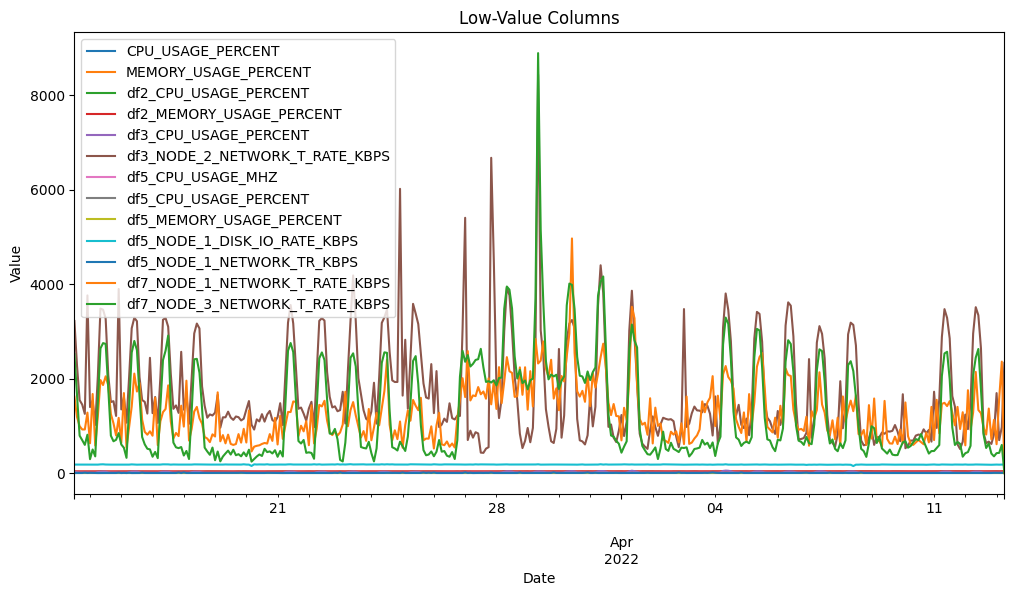

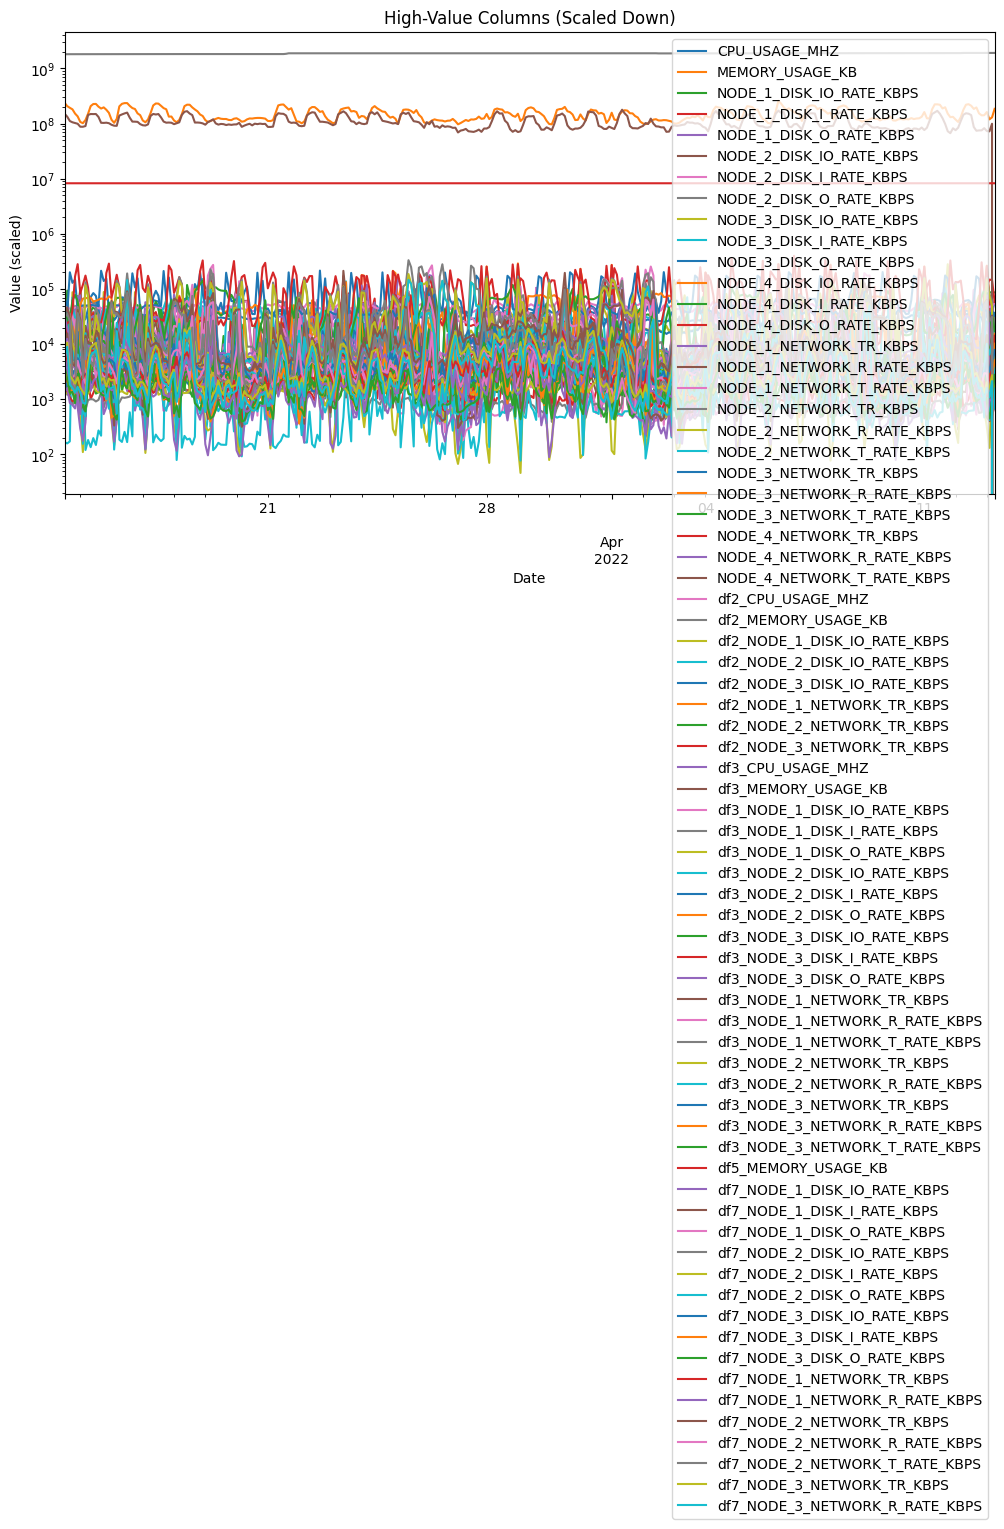

In [21]:
threshold = 10_000  

# Identify high and low value columns
high_value_cols = df_combined_M.max() > threshold
low_value_cols = ~high_value_cols

# Plot low-value columns
df_combined_M.loc[:, low_value_cols].plot(figsize=(12, 6), title="Low-Value Columns")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="best")
plt.show()

# Plot high-value columns separately
df_combined_M.loc[:, high_value_cols].plot(figsize=(12, 6), title="High-Value Columns (Scaled Down)")
plt.xlabel("Date")
plt.ylabel("Value (scaled)")
plt.legend(loc="best")
plt.yscale("log")  # Optional: Log scale for better visualization
plt.show()

In [22]:
df_combined_M = df_combined_M[['CPU_USAGE_PERCENT_1_1']]

KeyError: "None of [Index(['CPU_USAGE_PERCENT_1_1'], dtype='object')] are in the [columns]"

X shape: (274, 84, 1)
y shape: (274, 1)
Total samples: 274, Initial training samples: 137, Test fold size: 24, Number of folds: 5

=== Fold 1/5 ===
Training samples: 137 | Testing samples: 24
Epoch 01/10 - Train Loss: 0.2259 | Test Loss: 0.1517
Epoch 02/10 - Train Loss: 0.1157 | Test Loss: 0.0608
Epoch 03/10 - Train Loss: 0.0584 | Test Loss: 0.0260
Epoch 04/10 - Train Loss: 0.0532 | Test Loss: 0.0276
Epoch 05/10 - Train Loss: 0.0602 | Test Loss: 0.0248
Epoch 06/10 - Train Loss: 0.0492 | Test Loss: 0.0283
Epoch 07/10 - Train Loss: 0.0449 | Test Loss: 0.0277
Epoch 08/10 - Train Loss: 0.0431 | Test Loss: 0.0242
Epoch 09/10 - Train Loss: 0.0372 | Test Loss: 0.0221
Epoch 10/10 - Train Loss: 0.0355 | Test Loss: 0.0203

=== Fold 2/5 ===
Training samples: 161 | Testing samples: 24
Epoch 01/10 - Train Loss: 0.1502 | Test Loss: 0.0904
Epoch 02/10 - Train Loss: 0.0613 | Test Loss: 0.0436
Epoch 03/10 - Train Loss: 0.0546 | Test Loss: 0.0417
Epoch 04/10 - Train Loss: 0.0546 | Test Loss: 0.0434
Epoc

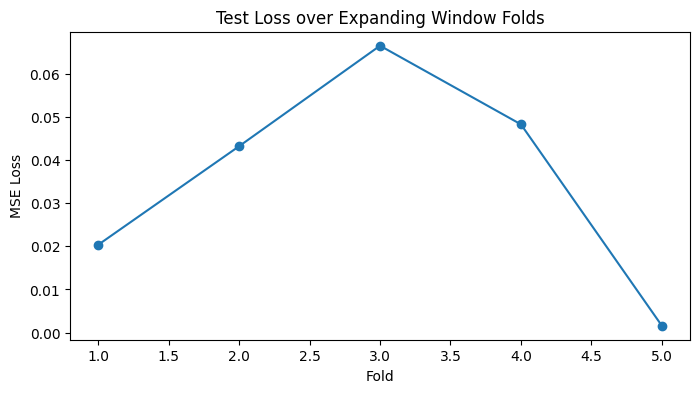

In [22]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import random

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Scale the data using MinMaxScaler so that each feature is in [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_combined_M.values)  # shape: (n_samples, n_features)

# Define a helper function to convert the time series into sequences.
# For each window of length 'seq_length' we forecast the next time step.
def create_sequences(data, seq_length):
    """
    Args:
        data (np.ndarray): Array of shape (n_samples, n_features)
        seq_length (int): Number of past time steps to use as input.
    Returns:
        X (np.ndarray): Array of shape (n_samples - seq_length, seq_length, n_features)
        y (np.ndarray): Array of shape (n_samples - seq_length, n_features)
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i: i + seq_length])
        y.append(data[i + seq_length])  # one-step ahead target
    return np.array(X), np.array(y)

sequence_length = 12 * 7

X, y = create_sequences(data_scaled, sequence_length)
print("X shape:", X.shape)  # (n_samples - sequence_length, sequence_length, n_features)
print("y shape:", y.shape)  # (n_samples - sequence_length, n_features)

class CNNLSTM(nn.Module):
    def __init__(self,
                 num_features,      # Number of input features (columns)
                 cnn_channels=64,   # Number of output channels from the conv layer
                 kernel_size=3,     # Kernel size for 1D conv
                 lstm_hidden_size=50,  # Hidden size for the LSTM layer
                 lstm_num_layers=1,    # Number of LSTM layers
                 dropout=0.5,         # Dropout probability
                 output_size=None):   # Output size; if None, defaults to num_features
        super(CNNLSTM, self).__init__()
        if output_size is None:
            output_size = num_features

        # The convolutional layer expects input as (batch, channels, sequence_length).
        # We use the number of features as the number of input channels.
        self.conv1 = nn.Conv1d(in_channels=num_features, out_channels=cnn_channels, kernel_size=kernel_size)
        self.relu = nn.ReLU()
        
        # The LSTM will process the features extracted by the conv layer.
        # Its input size is cnn_channels.
        self.lstm = nn.LSTM(input_size=cnn_channels,
                            hidden_size=lstm_hidden_size,
                            num_layers=lstm_num_layers,
                            batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(lstm_hidden_size, output_size)

    def forward(self, x):
        # x: (batch_size, seq_length, num_features)
        # Permute to (batch_size, num_features, seq_length) for Conv1d
        x = x.permute(0, 2, 1)
        x = self.conv1(x)         # -> (batch_size, cnn_channels, L_out)
        x = self.relu(x)
        # Permute back to (batch_size, L_out, cnn_channels) for LSTM (L_out may be different from input seq_length)
        x = x.permute(0, 2, 1)
        lstm_out, _ = self.lstm(x)  # lstm_out: (batch_size, L_out, lstm_hidden_size)
        # For prediction, we use the last output of the LSTM
        last_out = lstm_out[:, -1, :]  # (batch_size, lstm_hidden_size)
        out = self.dropout(last_out)
        out = self.fc(out)             # (batch_size, output_size)
        return out

#############################################
# 3. Define Training and Evaluation Routines
#############################################

def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / len(test_loader.dataset)
    return epoch_loss

#############################################
# 4. Expanding Window Cross Validation Setup
#############################################

# Hyperparameters for training
batch_size = 32
epochs = 10
learning_rate = 0.001

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Determine total number of samples available in the sequences
n_total = X.shape[0]

# Define the initial training size and test fold size.
# Here we use, for example, 50% of the available sequences for initial training.
initial_train_size = int(n_total * 0.5)
# And then each fold will test on a fixed number of sequences.
test_fold_size = 24  # adjust as appropriate

# Calculate the number of folds available
num_folds = (n_total - initial_train_size) // test_fold_size
print(f"Total samples: {n_total}, Initial training samples: {initial_train_size}, Test fold size: {test_fold_size}, Number of folds: {num_folds}")

#############################################
# 5. Run Expanding Window Cross Validation
#############################################

fold_results = []  # to store results of each fold

for fold in range(num_folds):
    # Determine the indices for the current fold
    train_end = initial_train_size + fold * test_fold_size
    test_end = train_end + test_fold_size
    if test_end > n_total:
        break  # not enough data for a final test fold
    
    # Slice the training and testing data for the current fold
    X_train_fold = X[:train_end]
    y_train_fold = y[:train_end]
    X_test_fold = X[train_end:test_end]
    y_test_fold = y[train_end:test_end]
    
    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_fold, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_fold, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_fold, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test_fold, dtype=torch.float32)
    
    # Create Datasets and DataLoaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize a new instance of the model for each fold
    num_features = X.shape[2]
    model = CNNLSTM(num_features=num_features).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    print(f"\n=== Fold {fold+1}/{num_folds} ===")
    print(f"Training samples: {len(train_dataset)} | Testing samples: {len(test_dataset)}")
    
    # Train the model for a fixed number of epochs
    for epoch in range(epochs):
        train_loss = train_model(model, train_loader, criterion, optimizer, device)
        test_loss = evaluate_model(model, test_loader, criterion, device)
        print(f"Epoch {epoch+1:02d}/{epochs:02d} - Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    
    # Optionally, store the final test loss of the fold for later analysis
    fold_results.append(test_loss)

print("\nExpanding Window CV completed.")
print("Test Loss per fold:", fold_results)

# (Optional) Plot the test loss for each fold
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(fold_results)+1), fold_results, marker='o')
plt.title("Test Loss over Expanding Window Folds")
plt.xlabel("Fold")
plt.ylabel("MSE Loss")
plt.show()

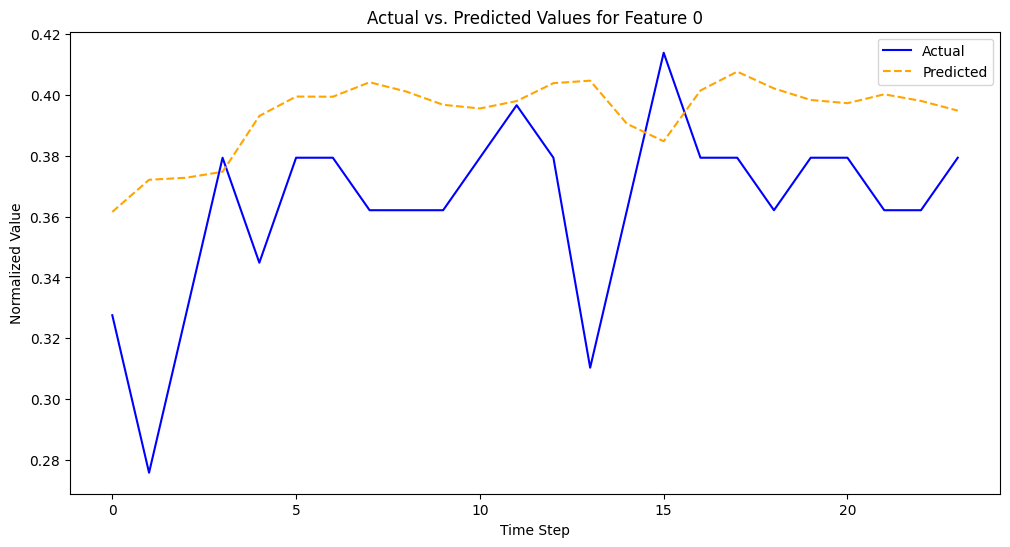

In [23]:
# After finishing training on one fold, evaluate the model on the test set.
# Assume 'model', 'test_loader', and 'device' are defined as in the training code.

model.eval()  # Set the model to evaluation mode
predictions = []
actual_values = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        # Get model outputs
        outputs = model(X_batch)
        # Append outputs and ground truth values (move to CPU and convert to numpy arrays)
        predictions.append(outputs.cpu().numpy())
        actual_values.append(y_batch.cpu().numpy())

# Concatenate batch results into full arrays
predictions = np.concatenate(predictions, axis=0)
actual_values = np.concatenate(actual_values, axis=0)

# For visualization, let's plot the results for the first feature (column index 0).
plt.figure(figsize=(12, 6))
plt.plot(actual_values[:, 0], label="Actual", color="blue")
plt.plot(predictions[:, 0], label="Predicted", color="orange", linestyle="--")
plt.xlabel("Time Step")
plt.ylabel("Normalized Value")
plt.title("Actual vs. Predicted Values for Feature 0")
plt.legend()
plt.show()

## Knowlege Destillation

In [24]:
teacher_model = model

In [25]:
import torch
import torch.nn as nn

class SimpleCNNLSTM(nn.Module):
    def __init__(self, num_features, cnn_channels=16, kernel_size=3,
                 lstm_hidden_size=16, lstm_num_layers=1, dropout=0.2, output_size=None):
        """
        A simpler CNN-LSTM model for online learning.
        
        Args:
            num_features (int): Number of input features.
            cnn_channels (int): Number of channels for the convolution layer (smaller than teacher).
            kernel_size (int): Kernel size for the conv layer.
            lstm_hidden_size (int): Hidden size for the LSTM (smaller than teacher).
            lstm_num_layers (int): Number of LSTM layers.
            dropout (float): Dropout probability.
            output_size (int): Output size (defaults to num_features).
        """
        super(SimpleCNNLSTM, self).__init__()
        if output_size is None:
            output_size = num_features

        # Convolutional layer: input shape (batch, num_features, seq_length)
        self.conv1 = nn.Conv1d(in_channels=num_features, out_channels=cnn_channels, kernel_size=kernel_size)
        self.relu = nn.ReLU()
        
        # LSTM to capture sequential dependencies.
        self.lstm = nn.LSTM(input_size=cnn_channels,
                            hidden_size=lstm_hidden_size,
                            num_layers=lstm_num_layers,
                            batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(lstm_hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch_size, seq_length, num_features)
        x = x.permute(0, 2, 1)  # rearrange to (batch_size, num_features, seq_length)
        x = self.conv1(x)
        x = self.relu(x)
        x = x.permute(0, 2, 1)  # back to (batch_size, new_seq_length, cnn_channels)
        lstm_out, _ = self.lstm(x)
        last_out = lstm_out[:, -1, :]  # use last time step
        out = self.dropout(last_out)
        out = self.fc(out)
        return out


In [26]:
import torch.nn.functional as F

def distillation_loss(student_output, teacher_output, ground_truth, alpha=0.5):
    """
    Combines teacher imitation and ground truth loss.
    
    Args:
        student_output (Tensor): Output from the student model.
        teacher_output (Tensor): Output from the teacher model.
        ground_truth (Tensor): True target values.
        alpha (float): Weighting factor between teacher imitation and ground truth (0 <= alpha <= 1).
    
    Returns:
        Tensor: The combined loss value.
    """
    loss_teacher = F.mse_loss(student_output, teacher_output)
    loss_ground = F.mse_loss(student_output, ground_truth)
    return alpha * loss_teacher + (1 - alpha) * loss_ground


In [27]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Example: assume X_train and y_train are numpy arrays of shapes:
#   X_train: (num_samples, sequence_length, num_features)
#   y_train: (num_samples, num_features)

# Convert training data to PyTorch tensors
X_train_tensor = torch.tensor(X, dtype=torch.float32)
y_train_tensor = torch.tensor(y, dtype=torch.float32)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Instantiate the simplified student model
num_features = X.shape[2]
student_model = SimpleCNNLSTM(num_features=num_features).to(device)

# Assume teacher_model is your pre-trained, heavier CNN-LSTM
teacher_model.eval()  # Ensure teacher is in evaluation mode
for param in teacher_model.parameters():
    param.requires_grad = False  # Freeze teacher parameters

# Set up optimizer
optimizer = optim.Adam(student_model.parameters(), lr=0.001)

# Distillation training parameters
epochs = 20
alpha = 0.5  # Balance between teacher's guidance and ground truth

for epoch in range(epochs):
    student_model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Obtain teacher predictions (without computing gradients)
        with torch.no_grad():
            teacher_output = teacher_model(X_batch)
        
        # Get student predictions
        student_output = student_model(X_batch)
        
        # Compute the combined loss
        loss = distillation_loss(student_output, teacher_output, y_batch, alpha=alpha)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}")


Epoch 1/20 - Loss: 0.0413
Epoch 2/20 - Loss: 0.0299
Epoch 3/20 - Loss: 0.0277
Epoch 4/20 - Loss: 0.0247
Epoch 5/20 - Loss: 0.0247
Epoch 6/20 - Loss: 0.0204
Epoch 7/20 - Loss: 0.0208
Epoch 8/20 - Loss: 0.0188
Epoch 9/20 - Loss: 0.0185
Epoch 10/20 - Loss: 0.0162
Epoch 11/20 - Loss: 0.0168
Epoch 12/20 - Loss: 0.0160
Epoch 13/20 - Loss: 0.0157
Epoch 14/20 - Loss: 0.0143
Epoch 15/20 - Loss: 0.0145
Epoch 16/20 - Loss: 0.0142
Epoch 17/20 - Loss: 0.0131
Epoch 18/20 - Loss: 0.0130
Epoch 19/20 - Loss: 0.0132
Epoch 20/20 - Loss: 0.0140


In [28]:
def online_update(student_model, teacher_model, new_X, new_y, optimizer, alpha=0.5):
    """
    Perform an online update on the student model with new data.
    
    Args:
        student_model (nn.Module): The simplified student CNN-LSTM model.
        teacher_model (nn.Module): The frozen teacher CNN-LSTM model.
        new_X (np.ndarray): New input data (batch_size, sequence_length, num_features).
        new_y (np.ndarray): New ground truth data (batch_size, num_features).
        optimizer (Optimizer): Optimizer for updating the student model.
        alpha (float): Weight for the distillation loss.
        
    Returns:
        float: The computed loss for this online update batch.
    """
    student_model.train()
    X_tensor = torch.tensor(new_X, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(new_y, dtype=torch.float32).to(device)
    
    with torch.no_grad():
        teacher_output = teacher_model(X_tensor)
    
    student_output = student_model(X_tensor)
    loss = distillation_loss(student_output, teacher_output, y_tensor, alpha=alpha)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss.item()


In [29]:
df = pd.read_csv('./azure/azure.csv', parse_dates=['timestamp'])

# Clean column names: remove spaces (e.g., "min cpu" becomes "min_cpu")
df.columns = df.columns.str.strip().str.replace(' ', '_')
# Now the columns are: timestamp, min_cpu, max_cpu, avg_cpu

# Set the timestamp column as the index.
df.set_index('timestamp', inplace=True)

# Resample the data to 2-hour intervals using mean aggregation.
df_resampled = df.resample('2H').mean()
df_resampled = df_resampled.dropna()  # Remove any intervals that have missing values

print("Resampled DataFrame (first few rows):")
print(df_resampled.head())

# === 2. Create Sequences for the Online Update ===

data = df_resampled[['avg_cpu']].values

new_X, new_y = create_sequences(data, sequence_length)
print("Shape of new_X (input sequences):", new_X.shape)
print("Shape of new_y (targets):", new_y.shape)

# === 3. Select a Batch and Perform the Online Update ===

# For the online update, we select a batch (e.g., the last 32 sequences).
batch_size = 32
if new_X.shape[0] >= batch_size:
    batch_X = new_X[-batch_size:]
    batch_y = new_y[-batch_size:]
else:
    batch_X = new_X
    batch_y = new_y

# Perform the online update using the selected batch.
loss_online = online_update(student_model, teacher_model, batch_X, batch_y, optimizer, alpha=0.5)
print(f"Online update loss: {loss_online:.4f}")


Resampled DataFrame (first few rows):
                           min_cpu       max_cpu       avg_cpu
timestamp                                                     
2017-01-01 00:00:00  673009.150851  2.169454e+06  1.166156e+06
2017-01-01 02:00:00  640156.997540  2.066974e+06  1.098798e+06
2017-01-01 04:00:00  629080.910460  2.047751e+06  1.078104e+06
2017-01-01 06:00:00  640426.668829  2.080981e+06  1.101336e+06
2017-01-01 08:00:00  640804.307291  2.112639e+06  1.118101e+06
Shape of new_X (input sequences): (276, 84, 1)
Shape of new_y (targets): (276, 1)
Online update loss: 836790517760.0000


Azure data source: https://github.com/amcs1729/Predicting-cloud-CPU-usage-on-Azure-data/blob/master/azure.csv

In [ ]:

import torch
from kafka import KafkaConsumer

# Create a Kafka consumer.
consumer = KafkaConsumer(
    'avg_cpu_topic',
    bootstrap_servers=['localhost:9092'],
    auto_offset_reset='earliest',
    group_id='online_training_group',
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))
)

print("Starting Kafka consumer for online training...")
for message in consumer:
    data = message.value
    # Expecting messages with keys "new_X" and "new_y"
    new_X = data.get("new_X")
    new_y = data.get("new_y")
    
    if new_X is None or new_y is None:
        print("Received message with missing data, skipping:", data)
        continue

    # Optionally, ensure new_X and new_y are numpy arrays.
    # For example, if they are sent as lists:
    import numpy as np
    new_X = np.array(new_X)
    new_y = np.array(new_y)
    
    loss = online_update(student_model, teacher_model, new_X, new_y, optimizer, alpha=0.5)
    print(f"Online update loss: {loss:.4f}")


Starting Kafka consumer for online training...
Online update loss: 715967561728.0000
Online update loss: 726747512832.0000
Online update loss: 740847976448.0000
Online update loss: 690023235584.0000
Online update loss: 705030848512.0000
Online update loss: 728465211392.0000
Online update loss: 752063807488.0000
Online update loss: 839990050816.0000
Online update loss: 842393255936.0000


## Google Cluster Data

In [ ]:
import os
import gzip
import pandas as pd
from google.cloud import storage

def download_and_load_json(bucket_name: str, prefix: str, destination_dir: str) -> pd.DataFrame:
    # Create the destination directory if it doesn't exist.
    os.makedirs(destination_dir, exist_ok=True)
    
    client = storage.Client()
    bucket = client.bucket(bucket_name)
    # List all blobs (files) that match the prefix
    blobs = bucket.list_blobs(prefix=prefix)
    
    data = []
    for blob in blobs:
        # Define a local filename (preserving the blob’s relative path)
        local_filename = os.path.join(destination_dir, os.path.basename(blob.name))
        print(f"Downloading {blob.name} to {local_filename} ...")
        blob.download_to_filename(local_filename)
        
        # Decompress the gzipped file and read JSON lines
        print(f"Decompressing and reading {local_filename} ...")
        with gzip.open(local_filename, 'rt', encoding='utf-8') as f:
            for line in f:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Error decoding line in {local_filename}: {e}")
    
    print(f"Loaded {len(data)} records from bucket {bucket_name}.")
    return pd.DataFrame(data)

# Example usage:
# Set these parameters to match the data you want to download.
bucket_name = "clusterdata_2019_b"  # for cell a
prefix = "instance_usage-"          # to get all shards for instance_usage
destination_dir = "./google_cluster_data/clusterdata_2019_b/"

# Download and load the data into a DataFrame.
df_instance_usage = download_and_load_json(bucket_name, prefix, destination_dir)

# (Optional) Inspect the DataFrame.
print(df_instance_usage.head())


Decompressing and reading ./google_cluster_data/clusterdata_2019_b/instance_usage-000000000000.json.gz ...


In [1]:
!gunzip ./google_cluster_data/clusterdata_2019_b/instance_usage-000000000000.json.gz

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


In [3]:
!head ./google_cluster_data/clusterdata_2019_b/instance_usage-000000000000.json

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
{"start_time":"2191220000000","end_time":"2191221000000","collection_id":"496921114531","instance_index":"3619","machine_id":"16521973134","alloc_collection_id":"0","alloc_instance_index":"-1","collection_type":"0","average_usage":{"cpus":6.67572021484375e-06,"memory":7.62939453125e-06},"maximum_usage":{"cpus":6.67572021484375e-06,"memory":7.62939453125e-06},"random_sample_usage":{"cpus":5.7220458984375e-06},"assigned_memory":0.00390625,"page_cache_memory":0,"cycles_per_instruction":3.3235776424407959,"memory_accesses_per_instruction":0.017735723406076431,"sample_rate":1,"cpu_usage_distribution":[6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e-06],"tail_cpu_usage_distribution":[6.67572021484375e-06,6.67572021484375e-06,6.67572021484375e

In [5]:
import pandas as pd

# Specify the chunk size (number of rows per chunk)
chunksize = 100000

# Read the file in chunks; each chunk is an iterator over DataFrames.
chunks = pd.read_json('./google_cluster_data/clusterdata_2019_b/instance_usage-000000000000.json', lines=True, chunksize=chunksize)

for i, chunk in enumerate(chunks):
    # Process each chunk as a DataFrame.
    print(f"Processing chunk {i+1} with shape {chunk.shape}")
    print("Columns:", chunk.columns)
    print(chunk.head())
    # For example, you might filter, aggregate, or update your model here.


Processing chunk 1 with shape (100000, 18)
Columns: Index(['start_time', 'end_time', 'collection_id', 'instance_index',
       'machine_id', 'alloc_collection_id', 'alloc_instance_index',
       'collection_type', 'average_usage', 'maximum_usage',
       'random_sample_usage', 'assigned_memory', 'page_cache_memory',
       'cycles_per_instruction', 'memory_accesses_per_instruction',
       'sample_rate', 'cpu_usage_distribution', 'tail_cpu_usage_distribution'],
      dtype='object')
           start_time            end_time  collection_id  instance_index  \
0 2039-06-09 08:13:20 2039-06-09 08:30:00   496921114531            3619   
1 2050-05-20 07:03:20 2050-05-20 07:36:40   496921114531               1   
2 2041-03-16 09:30:00 2041-03-16 10:20:00   496921114531             914   
3 2040-07-05 10:30:00 2040-07-05 10:46:40   496921114531            3275   
4 2040-07-10 01:03:20 2040-07-10 02:26:40   496921114531            2709   

    machine_id  alloc_collection_id  alloc_instance_ind

KeyboardInterrupt: 

In [5]:
import pandas as pd
chunks = pd.read_json('./google_cluster_data/clusterdata_2019_b/instance_usage_filtered-000000000000.json', lines=True)

In [6]:
chunks

,start_time,end_time,collection_id,instance_index,machine_id,alloc_collection_id,alloc_instance_index,collection_type,average_usage,maximum_usage,random_sample_usage,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution
0,2031-03-29 08:23:20,2031-03-29 10:20:00,496921114531,2370,140298552,0,-1,0,"{'cpus': 4.863739013671876e-05, 'memory': 6.67...","{'cpus': 0.00022983551025300002, 'memory': 7.6...",{'cpus': 2.86102294921875e-06},0.003906,9.536743e-07,3.517750,0.013386,1.0,"[0, 0, 0, 7.62939453125e-06, 1.430511474609375...","[0.00021457672119100003, 0.0002145767211910000..."
1,2042-04-23 06:06:40,2042-04-23 08:03:20,496921114531,851,92461914,0,-1,0,"{'cpus': 6.29425048828125e-05, 'memory': 2.765...","{'cpus': 0.00035381317138600003, 'memory': 3.0...",{'cpus': 9.5367431640625e-07},0.003906,3.347397e-04,2.047353,0.007648,1.0,"[0, 0, 1.9073486328125e-06, 8.58306884765625e-...","[0.00034332275390600004, 0.0003433227539060000..."
2,2034-06-21 15:03:20,2034-06-21 17:00:00,496921114531,163,16457967704,0,-1,0,"{'cpus': 0.00020408630371000002, 'memory': 0.0...","{'cpus': 0.001461029052734, 'memory': 0.000122...",{'cpus': 5.7220458984375e-06},0.003906,3.242493e-04,1.551731,0.005940,1.0,"[0, 0, 4.76837158203125e-06, 1.049041748046875...","[9.250640869140626e-05, 9.250640869140626e-05,..."
3,2039-05-14 21:06:40,2039-05-14 23:03:20,496921114531,4373,81361536715,0,-1,0,"{'cpus': 4.959106445312501e-05, 'memory': 3.43...","{'cpus': 0.00034523010253900005, 'memory': 0.0...",{'cpus': 9.5367431640625e-07},0.003906,3.252029e-04,2.667074,0.011225,1.0,"[0, 0, 1.9073486328125e-06, 8.58306884765625e-...","[0.00029182434082000003, 0.0002918243408200000..."
4,2037-11-30 09:10:00,2037-11-30 11:06:40,496921114531,1631,16457570716,0,-1,0,"{'cpus': 0.00022983551025300002, 'memory': 2.9...","{'cpus': 0.0016117095947260002, 'memory': 3.14...",{'cpus': 0.0014934539794920001},0.003906,3.280640e-04,2.183969,0.013112,1.0,"[0, 0, 0, 9.5367431640625e-07, 2.8610229492187...","[7.62939453125e-06, 7.62939453125e-06, 7.62939..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,1992-06-17 15:13:20,1992-06-17 17:10:00,462378395885,2339,1652923967,0,-1,0,"{'cpus': 0.000274658203125, 'memory': 6.198883...","{'cpus': 0.002079010009765, 'memory': 6.294250...",{'cpus': 0.002079010009765},0.009293,1.008987e-03,NaN,NaN,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 9.5367431640625e-0...","[9.5367431640625e-07, 9.5367431640625e-07, 9.5..."
12822,1992-06-17 04:06:40,1992-06-17 06:03:20,462378395885,2977,28536972832,0,-1,0,"{'cpus': 0.000732421875, 'memory': 6.580352783...","{'cpus': 0.005126953125, 'memory': 6.675720214...",{'cpus': 6.198883056640625e-05},0.009293,1.008987e-03,NaN,NaN,1.0,"[0, 0, 0, 0, 0, 0, 0, 9.5367431640625e-07, 9.5...","[9.5367431640625e-07, 9.5367431640625e-07, 9.5..."
12823,1992-06-16 13:23:20,1992-06-16 15:20:00,462378395885,3053,28576051903,0,-1,0,"{'cpus': 0.0005884170532220001, 'memory': 6.29...","{'cpus': 0.004119873046875, 'memory': 6.484985...",{'cpus': 1.2397766113281252e-05},0.009293,1.008987e-03,NaN,NaN,1.0,"[0, 0, 0, 0, 0, 9.5367431640625e-07, 9.5367431...","[9.5367431640625e-07, 9.5367431640625e-07, 9.5..."
12824,1992-06-16 18:56:40,1992-06-16 20:53:20,462378395885,2460,92654142,0,-1,0,"{'cpus': 8.964538574218751e-05, 'memory': 4.19...","{'cpus': 0.001087188720703, 'memory': 5.722045...",{'cpus': 6.771087646484375e-05},0.009293,4.329681e-04,NaN,NaN,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 9.5367431640625e-07, ...","[9.5367431640625e-07, 9.5367431640625e-07, 9.5..."


In [3]:
chunks = chunks.sort_index()

In [4]:
chunks

,start_time,end_time,collection_id,instance_index,machine_id,alloc_collection_id,alloc_instance_index,collection_type,average_usage,maximum_usage,random_sample_usage,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution
0,2031-03-29 08:23:20,2031-03-29 10:20:00,496921114531,2370,140298552,0,-1,0,"{'cpus': 4.863739013671876e-05, 'memory': 6.67...","{'cpus': 0.00022983551025300002, 'memory': 7.6...",{'cpus': 2.86102294921875e-06},0.003906,9.536743e-07,3.517750,0.013386,1.0,"[0, 0, 0, 7.62939453125e-06, 1.430511474609375...","[0.00021457672119100003, 0.0002145767211910000..."
1,2042-04-23 06:06:40,2042-04-23 08:03:20,496921114531,851,92461914,0,-1,0,"{'cpus': 6.29425048828125e-05, 'memory': 2.765...","{'cpus': 0.00035381317138600003, 'memory': 3.0...",{'cpus': 9.5367431640625e-07},0.003906,3.347397e-04,2.047353,0.007648,1.0,"[0, 0, 1.9073486328125e-06, 8.58306884765625e-...","[0.00034332275390600004, 0.0003433227539060000..."
2,2034-06-21 15:03:20,2034-06-21 17:00:00,496921114531,163,16457967704,0,-1,0,"{'cpus': 0.00020408630371000002, 'memory': 0.0...","{'cpus': 0.001461029052734, 'memory': 0.000122...",{'cpus': 5.7220458984375e-06},0.003906,3.242493e-04,1.551731,0.005940,1.0,"[0, 0, 4.76837158203125e-06, 1.049041748046875...","[9.250640869140626e-05, 9.250640869140626e-05,..."
3,2039-05-14 21:06:40,2039-05-14 23:03:20,496921114531,4373,81361536715,0,-1,0,"{'cpus': 4.959106445312501e-05, 'memory': 3.43...","{'cpus': 0.00034523010253900005, 'memory': 0.0...",{'cpus': 9.5367431640625e-07},0.003906,3.252029e-04,2.667074,0.011225,1.0,"[0, 0, 1.9073486328125e-06, 8.58306884765625e-...","[0.00029182434082000003, 0.0002918243408200000..."
4,2037-11-30 09:10:00,2037-11-30 11:06:40,496921114531,1631,16457570716,0,-1,0,"{'cpus': 0.00022983551025300002, 'memory': 2.9...","{'cpus': 0.0016117095947260002, 'memory': 3.14...",{'cpus': 0.0014934539794920001},0.003906,3.280640e-04,2.183969,0.013112,1.0,"[0, 0, 0, 9.5367431640625e-07, 2.8610229492187...","[7.62939453125e-06, 7.62939453125e-06, 7.62939..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,1992-06-17 15:13:20,1992-06-17 17:10:00,462378395885,2339,1652923967,0,-1,0,"{'cpus': 0.000274658203125, 'memory': 6.198883...","{'cpus': 0.002079010009765, 'memory': 6.294250...",{'cpus': 0.002079010009765},0.009293,1.008987e-03,NaN,NaN,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 9.5367431640625e-0...","[9.5367431640625e-07, 9.5367431640625e-07, 9.5..."
12822,1992-06-17 04:06:40,1992-06-17 06:03:20,462378395885,2977,28536972832,0,-1,0,"{'cpus': 0.000732421875, 'memory': 6.580352783...","{'cpus': 0.005126953125, 'memory': 6.675720214...",{'cpus': 6.198883056640625e-05},0.009293,1.008987e-03,NaN,NaN,1.0,"[0, 0, 0, 0, 0, 0, 0, 9.5367431640625e-07, 9.5...","[9.5367431640625e-07, 9.5367431640625e-07, 9.5..."
12823,1992-06-16 13:23:20,1992-06-16 15:20:00,462378395885,3053,28576051903,0,-1,0,"{'cpus': 0.0005884170532220001, 'memory': 6.29...","{'cpus': 0.004119873046875, 'memory': 6.484985...",{'cpus': 1.2397766113281252e-05},0.009293,1.008987e-03,NaN,NaN,1.0,"[0, 0, 0, 0, 0, 9.5367431640625e-07, 9.5367431...","[9.5367431640625e-07, 9.5367431640625e-07, 9.5..."
12824,1992-06-16 18:56:40,1992-06-16 20:53:20,462378395885,2460,92654142,0,-1,0,"{'cpus': 8.964538574218751e-05, 'memory': 4.19...","{'cpus': 0.001087188720703, 'memory': 5.722045...",{'cpus': 6.771087646484375e-05},0.009293,4.329681e-04,NaN,NaN,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 9.5367431640625e-07, ...","[9.5367431640625e-07, 9.5367431640625e-07, 9.5..."


In [6]:
import json
from tqdm import tqdm  # Optional: install via `pip install tqdm`

# Define file paths
input_file = './google_cluster_data/clusterdata_2019_b/instance_usage-000000000000.json'       # Your large JSON file (newline-delimited)
output_file = './google_cluster_data/clusterdata_2019_b/instance_usage_filtered-000000000000.json'   # Output file to store filtered records

# Define the desired window (2 hours) and a tolerance (30 minutes) in milliseconds
desired_window_ms = 2 * 3600 * 1000  # 7,200,000 ms for 2 hours
tolerance_ms = 5 * 60 * 1000        # 1,800,000 ms for 5 minutes

# (Optional) Count total lines for a progress bar. If this takes too long,
# you can remove the counting and use tqdm without total.
with open(input_file, 'r', encoding='utf-8') as f:
    total_lines = sum(1 for _ in f)

# Process the file line by line and write out only matching records.
with open(input_file, 'r', encoding='utf-8') as fin, open(output_file, 'w', encoding='utf-8') as fout:
    for line in tqdm(fin, total=total_lines, desc="Filtering records"):
        try:
            record = json.loads(line)
            # Convert start_time and end_time to integers.
            start_time = int(record.get('start_time', 0))
            end_time = int(record.get('end_time', 0))
            diff = end_time - start_time
            
            # Check if the difference is within the desired window ± tolerance.
            if abs(diff - desired_window_ms) <= tolerance_ms:
                # Write the record as a JSON line in the output file.
                fout.write(json.dumps(record) + "\n")
        except Exception as e:
            print(f"Error processing a line: {e}")


Filtering records: 100%|██████████| 3485750/3485750 [00:54<00:00, 64241.23it/s] 
